<a href="https://colab.research.google.com/github/Junjaee/Study/blob/main/MachineLearning_DeepLearning/Study/09_CNN_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%tensorflow_version 1.x

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# 1. 기본 예제


## (1) 샘플 1
- 3 * 3 * 1 * 1 이미지 준비
- 2 * 2 * 2 필터 준비

(1, 3, 3, 1)


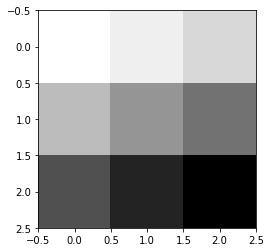

In [3]:
image = np.array([[[[1], [2], [3]],
                  [[4], [5], [6]],
                  [[7], [8], [9]]]], dtype=np.float32)

print(image.shape)
plt.imshow(image.reshape(3, 3), cmap="Greys")

(2, 2, 1, 1)
(1, 2, 2, 1)


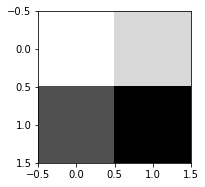

In [5]:
# padding 없이 convolution layer 추출
filter = tf.constant([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="VALID")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    #print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i + 1)
    plt.imshow(one_img.reshape(2, 2), cmap="Greys")

(2, 2, 1, 1)
(1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


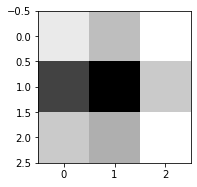

In [8]:
# padding을 이용한 convolution layer 추출
filter = tf.constant([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i + 1)
    plt.imshow(one_img.reshape(3, 3), cmap="Greys")

- 3개의 필터 사용 : 2 * 2 * 1 * 3

(2, 2, 1, 3)
(1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


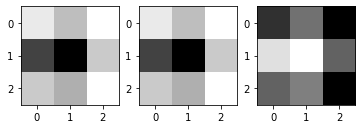

In [10]:
filter = tf.constant([[[[1., 10, -1]], [[1., 10, -1]]], [[[1., 10, -1]], [[1., 10, -1]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME")

sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i + 1)
    plt.imshow(one_img.reshape(3, 3), cmap="Greys")

- MaxPolling : 2 * 2 필터
- padding 없음

In [13]:
image2 = tf.constant([[[[4], [3]],
                       [[2], [1]]]])
print(image2.shape)

pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="VALID")

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4]]]]


In [15]:
# padding이 있을 경우

image2 = tf.constant([[[[4], [3]],
                       [[2], [1]]]])
print(image2.shape)

pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="SAME")

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 2, 2, 1)
(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


# 2. 사례1 : MNIST를 이용한 CNN

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official

(784,)


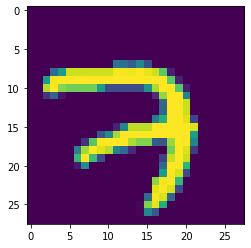

In [4]:
##### 데이터 확인

img = mnist.train.images[0]
print(img.shape)

plt.imshow(img.reshape(28, 28))

In [5]:
tf.reset_default_graph()

##### 입력받을 변수 준비

X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

## (1) 첫번째 convolution layer
- 필터
    - 크기 : 3 * 3
    - 갯수 : 32
    - 색상 수 : 1

In [22]:
# 원본 이미지 준비
origin_X = tf.reshape(X, [-1, 28, 28, 1])

# 필터 준비
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32]))

# convolution layer
Layer1 = tf.nn.conv2d(origin_X, W1, strides=[1, 1, 1, 1], padding="SAME")
print(Layer1)

Layer1 = tf.nn.relu(Layer1)
print(Layer1)

Tensor("Conv2D_1:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)


# 3. 사례2 : 교통 표지판을 이용한 CNN
- https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html
    - GTSRB_Final_Test_Images.zip
    - GTSRB_Final_Training_Images.zip
- 이미지(32*32) > Conv Layer1(Pooling) > Conv Layer2(Pooling) > FC

## (1) 이미지 전처리

In [7]:
import glob
from skimage.color import rgb2lab
from skimage.transform import resize
from collections import namedtuple
np.random.seed(101)

In [8]:
##### 상수 정의
N_CLASSES = 43
RESIZED_IMAGE = (32, 32)

In [9]:
# 값의 수정을 방지하기 위하여
Dataset = namedtuple("Dataset", ["X", "y"]) # {"Dataset" : ["X", "y"]}

In [ ]:
##### 이미지 크기를 재조정하고 색상은 회색조로 변경,  one-hot encoding
def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

def read_ppm(data, n_labels, resize_to):
    images = []
    labels = []

    for c in range(n_labels):
        full_path = data + '/' + format(c, '05d') + '/'

        for img_name in glob.glob(full_path + "*.ppm"):
            img = plt.imread(img_name).astype(np.float32)
            img = rgb2lab(img / 255.0)[:, :, 0]
            if resize_to:
                img = resize(img, resize_to, mode='reflect')
 
            label = np.zeros((n_labels,), dtype=np.float32)
            label[c] = 1.0
 
            images.append(img.astype(np.float32))
            labels.append(label)

    return Dataset(X=to_tf_format(images).astype(np.float32),
                   y=np.matrix(labels).astype(np.float32))

#--------------------------------------------------------------

ds = read_ppm("data/GTSRB/Final_Training/Images", N_CLASSES, RESIZED_IMAGE)
print(ds.X.shape)
print(ds.y.shape)

In [10]:
##### 이미지 확인

plt.imshow(ds.X[0, :, :, :].reshape(RESIZED_IMAGE))
print(ds.y[0, :])

In [ ]:
##### 훈련 데이터와 테스트 데이터의 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(range(ds.X.shape[0]), ds.y, test_size=0.25, random_state=101)

print(len(X_train), len(X_test))